In [49]:
import pandas as pd

In [50]:
df  =  pd.read_csv("Mall_Customers.csv")

In [51]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [52]:
df.shape

(200, 5)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [54]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [55]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [56]:
df.duplicated().sum() 

np.int64(0)

In [57]:
df1 = df.drop(columns="CustomerID",axis=1)

In [58]:
df1.duplicated().sum()

np.int64(0)

In [59]:
df["Gender"] = df["Gender"].map({"Male" : 1 , "Female" : 0})

In [60]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# EDA

* Univariate Analysis -  histogram
* Bivariate Analysis  -  scatter
* Multivariate Analysis -  HeatMap


In [61]:
import seaborn as sns

<Axes: xlabel='Gender', ylabel='Count'>

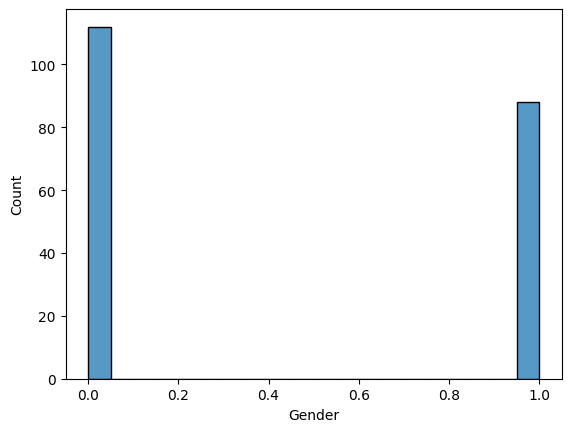

In [62]:
sns.histplot(x="Gender" , data=df , bins=20)

<Axes: xlabel='Age', ylabel='Count'>

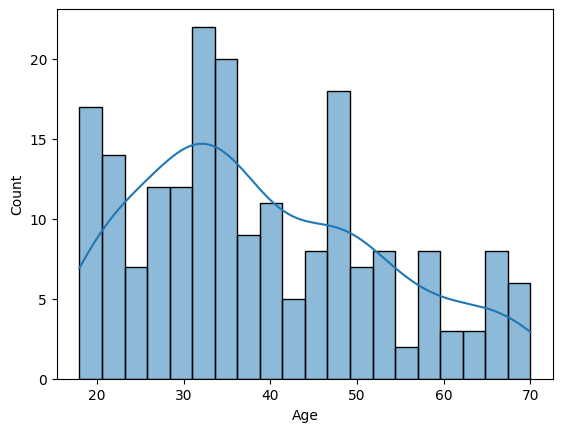

In [63]:
sns.histplot(x="Age" , data=df , bins=20 , kde=True)

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

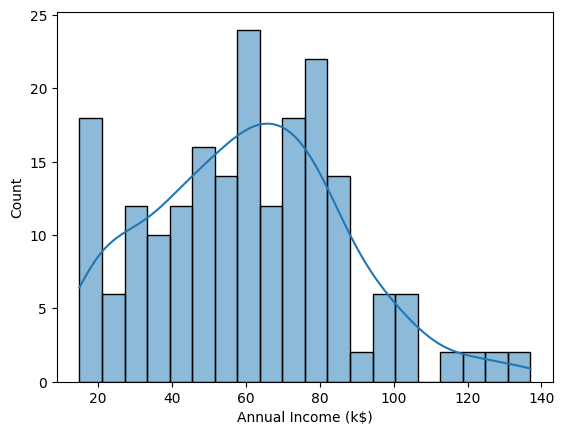

In [64]:
sns.histplot(x="Annual Income (k$)", data=df ,bins=20 , kde=True)

# Bivariate

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

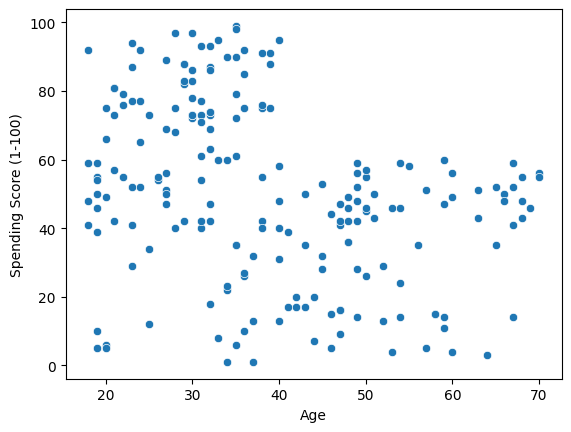

In [65]:
sns.scatterplot(x="Age" ,y="Spending Score (1-100)" , data=df)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

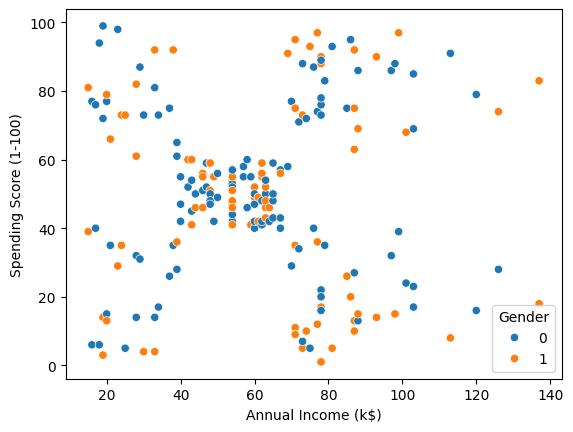

In [66]:
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)" ,hue="Gender" ,data=df) 

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

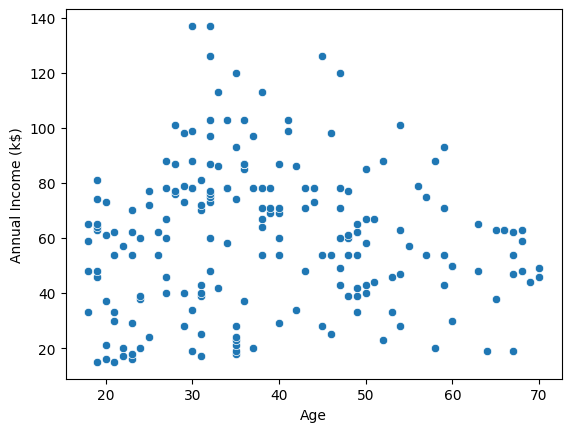

In [67]:
sns.scatterplot(x="Age" ,y="Annual Income (k$)"  , data=df)

<Axes: >

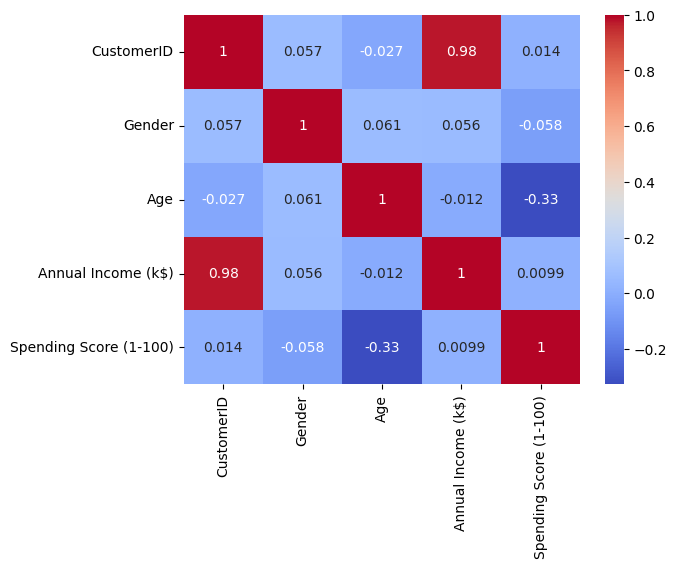

In [68]:
# multivariate

correlation = df.corr()

sns.heatmap(correlation ,cmap='coolwarm', annot=True)

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [70]:
Scaler  = StandardScaler()
scaled_data = Scaler.fit_transform(df)

In [71]:
pca_scaled = PCA(n_components=2)
X_pca = pca_scaled.fit_transform(scaled_data)

In [72]:
explained_variance = pca_scaled.explained_variance_ratio_


In [73]:
print(explained_variance)

[0.39701894 0.26948765]


# Part - 2

In [74]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30 ,max_iter=1000,random_state=42)
X_tsne = tsne.fit_transform(scaled_data)

df['tsne_1'] = X_tsne[:,0]
df['tsne_2'] = X_tsne[:,1]

In [75]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),tsne_1,tsne_2
0,1,1,19,15,39,-2.627598,-6.897671
1,2,1,21,15,81,-2.955647,-8.486877
2,3,0,20,16,6,-10.892815,2.284582
3,4,0,23,16,77,-12.668731,6.356482
4,5,0,31,17,40,-10.447139,3.640234


<Axes: xlabel='tsne_1', ylabel='tsne_2'>

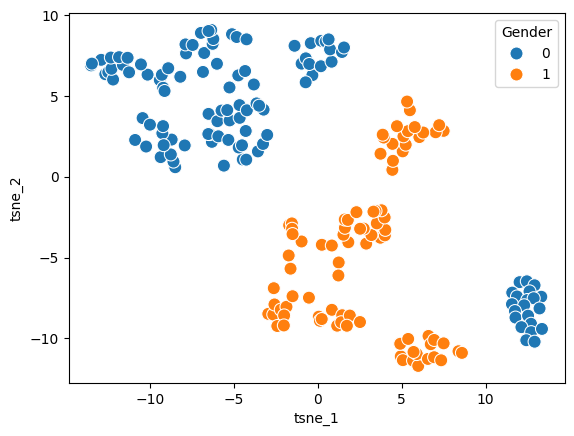

In [76]:
sns.scatterplot(data=df,x="tsne_1",y="tsne_2",s=88 , hue="Gender")

<Axes: xlabel='tsne_1', ylabel='tsne_2'>

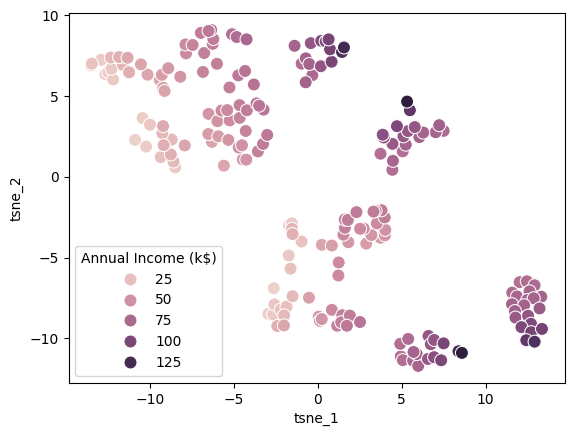

In [77]:
sns.scatterplot(data=df,x="tsne_1",y="tsne_2",s=88 , hue="Annual Income (k$)")

# Anomaly Detection

In [78]:
# IQR use only Annual Income and Spending Score 
X_anomaly = df[["Spending Score (1-100)" ,"Annual Income (k$)"]]



X_anomaly

,Spending Score (1-100),Annual Income (k$)
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17
...,...,...
195,79,120
196,28,126
197,74,126
198,18,137


In [79]:
Q1 = X_anomaly.quantile(0.25)

# Calculate Q3
Q3 = X_anomaly.quantile(0.75)

IQR = Q3 - Q1

lower_bound =  Q1 - 1.5*IQR

upper_bound =  Q3 + 1.5*IQR

In [80]:
outlier = ((X_anomaly < lower_bound ) | (X_anomaly > upper_bound)).any(axis=1)

In [81]:
print(outlier.sum())

2


In [82]:
X_anomaly[outlier]

,Spending Score (1-100),Annual Income (k$)
198,18,137
199,83,137


In [83]:
def z_score_outlier(df,threshold=2):
    outliers = {}
    for col in df.columns:
       z = (df[col] - df[col].mean())/df[col].std()
       outliers[col] =  df[abs(z) > threshold].index.tolist()
    return outliers

z_score_outlier(X_anomaly)


{'Spending Score (1-100)': [],
 'Annual Income (k$)': [194, 195, 196, 197, 198, 199]}

In [84]:
# isolation forest

from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05,random_state=42)
iso_prediction = iso_forest.fit_predict(scaled_data)

In [85]:
df["is_outlier"] = iso_prediction

In [86]:
(iso_prediction == -1).sum()

np.int64(10)

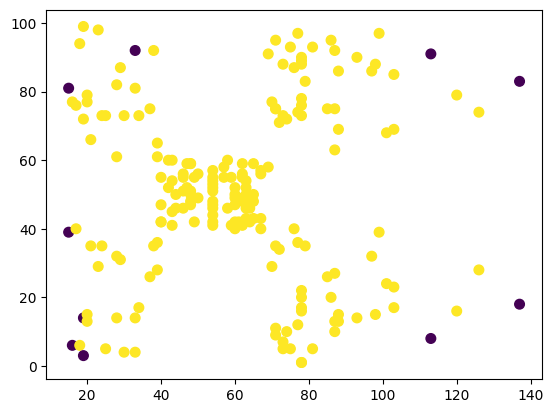

In [87]:
import matplotlib.pyplot as plt
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"],s=48,c =df['is_outlier'])


In [88]:
from sklearn.neighbors import LocalOutlierFactor

lof  =  LocalOutlierFactor(contamination=0.05 , n_neighbors=25)
y =  lof.fit_predict(scaled_data)

df['is_outlier'] = y


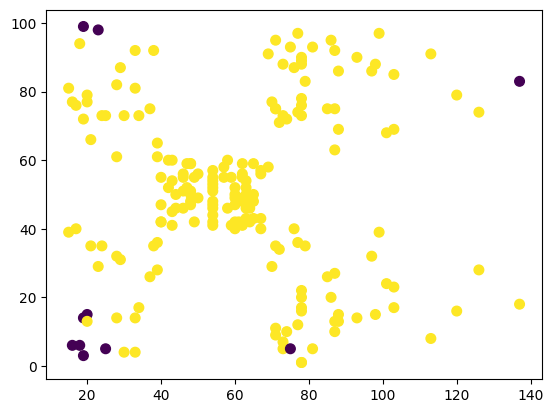

In [89]:
import matplotlib.pyplot as plt
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"],s=48,c =df['is_outlier'])


In [90]:
from sklearn.cluster import KMeans

interia = []

for  k in range(2,11):
    kmeans  = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(scaled_data)
    interia.append(kmeans.inertia_)

In [91]:
print(interia)

[715.2750473761118, 574.6285781223221, 519.1132528974904, 404.6481832764365, 354.3966472458641, 294.8058476285872, 254.4152172935256, 227.8463283694623, 190.3425217871548]


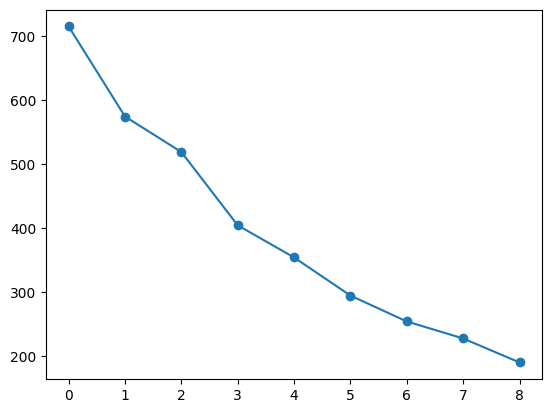

In [92]:
plt.plot( interia, marker ='o')

### Assumption  : Optimal Value of k is 5

In [93]:
kmeans = KMeans(n_clusters=5,random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

<Axes: >

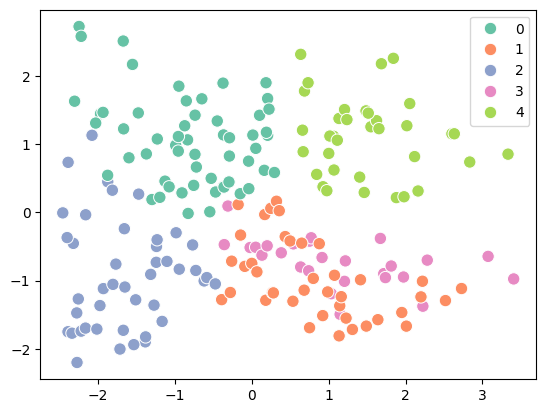

In [94]:
sns.scatterplot(data=df,x= X_pca[:,0],y=X_pca[:,1] ,palette='Set2',s=80 , hue=kmeans_labels)

/tmp/ipykernel_166909/3013230412.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df , x= X_pca[:,0],y=X_pca[:,1] ,palette='Set2')


<Axes: >

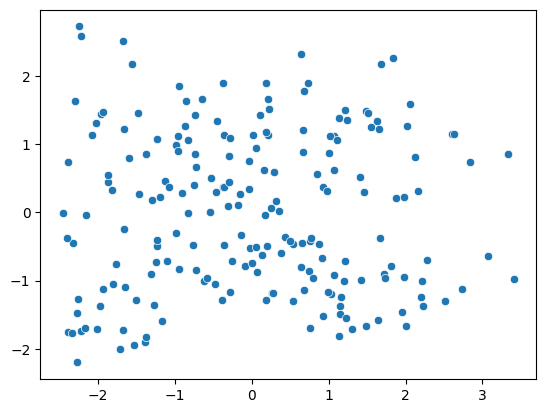

In [95]:
from sklearn.cluster import DBSCAN

dbsan = DBSCAN(eps=0.5 , min_samples=5)

dbsan_table = dbsan.fit_predict(scaled_data)

sns.scatterplot(data=df , x= X_pca[:,0],y=X_pca[:,1] ,palette='Set2')